In [42]:
import os
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"

import sys
sys.path.append("../")

import numpy as np
import matplotlib.pyplot as plt
import pickle

from DatasetManagerLibs import DatasetConvertor, DatasetReader
from libs.TrafficPredictor.ContextAssisted import PreparingDataset as PreparingDatasetCA


In [68]:
upsampleK = None
dataflow = "thumb_fr"

datasetReader = DatasetReader(parentFolder="../Dataset")
datasetConverter = DatasetConvertor()
datasetLabel = "Task0_1_2"
for taskName in ["Task0", "Task1", "Task2"]:
    for fileIndex in datasetReader.readFileIndexsList:
        datasetReader.readRawDataset(f"../Dataset/{taskName}/exp{fileIndex}/motion.txt", datasetLabel=datasetLabel)

datasetConverter.registerDataUnit(datasetReader.dfLibrary[datasetLabel])
datasetConverter.generateTrafficByDpdr(dbParameter=0.01, alpha=0.01, mode="fixed", direction="forward", upsampleK=upsampleK)
datasetConverter.generateTrafficByDpdr(dbParameter=0.05, alpha=0.01, mode="fixed", direction="backward", upsampleK=upsampleK)

datUnit = datasetConverter.getDataUnit(dataflow)
datUnit.display()

========== thumb ============
Forward: Compression rate:0.221078728127072
========== index ============
Forward: Compression rate:0.24367955259592378
========== middle ============
Forward: Compression rate:0.246975506164298
========== thumb ============
Backward: Compression rate:0.5228746865000432
========== index ============
Backward: Compression rate:0.4866768524123882
========== middle ============
Backward: Compression rate:0.501119471109958
Name: thumb, Ts:0.01, Data length:104067, Dim of context:3, Compression rate:0.221078728127072


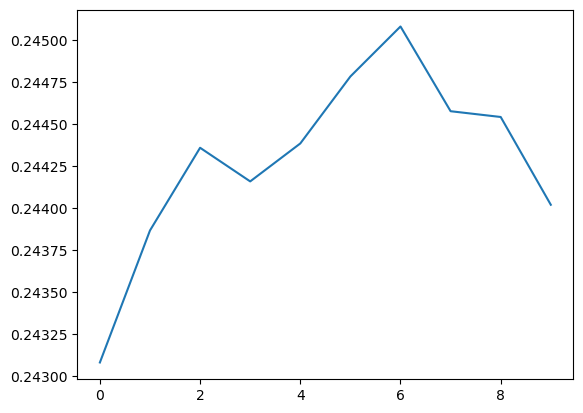

In [71]:
context = datUnit.contextData[0:10,0]
plt.plot(context.flatten())
plt.show()

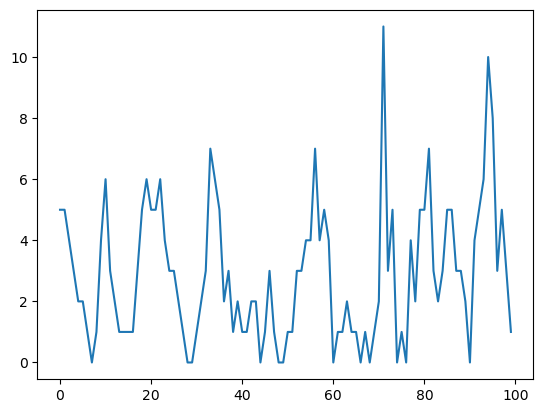

In [73]:
thumbDataUnit = datasetConverter.getDataUnit(dataflow)
lenWindow = 20
paramsCA = {}
paramsCA['lenSource'] = lenWindow
paramsCA['lenTarget'] = lenWindow
paramsCA['trainRatio'] = 0.6
paramsCA['dataAugment'] = False
paramsCA['smoothFc'] = 3.0
paramsCA['smoothOrder'] = 3
trainDataCA, testDataCA = PreparingDatasetCA(thumbDataUnit, paramsCA, verbose=False)

(_,_,_,traffic_source,_,_,_,_) = testDataCA 
plt.plot(traffic_source.flatten()[0:100])
plt.show()
